In [1]:
import cv2
import numpy as np
import IPython.display as dp
from google.colab.patches import cv2_imshow
import codecs, base64

In [3]:
# 嘗試觀看影片

!ffmpeg -i h3.mp4 -vcodec libx264 h4.mp4

with codecs.open('h4.mp4', 'rb') as f :
  
  d = base64.b64encode(f.read()).decode()
 
dp.HTML(f'<video src="data:video/mp4;base64,{d}" controls />')

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

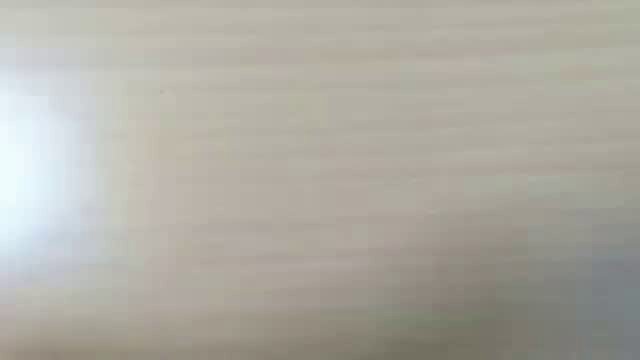

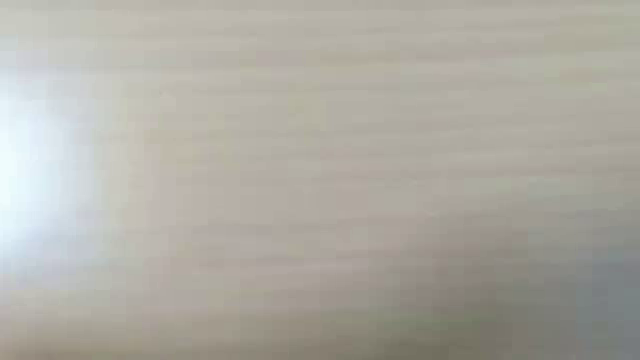

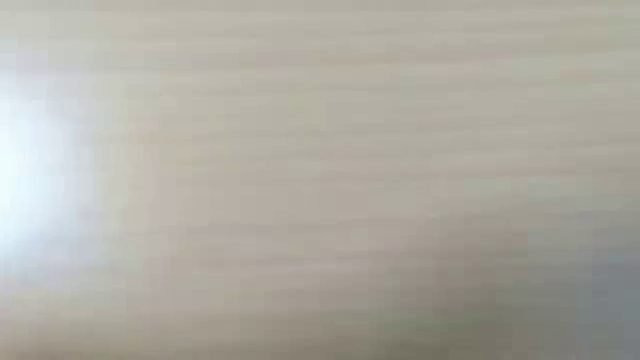

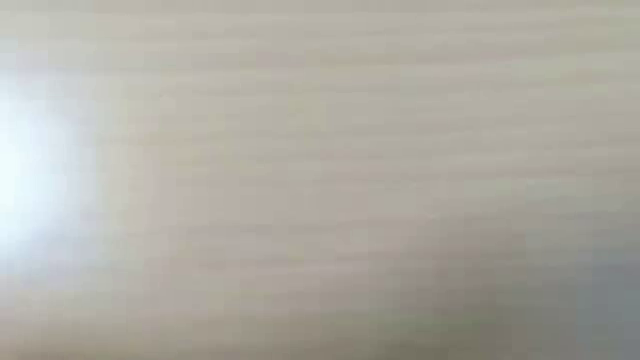

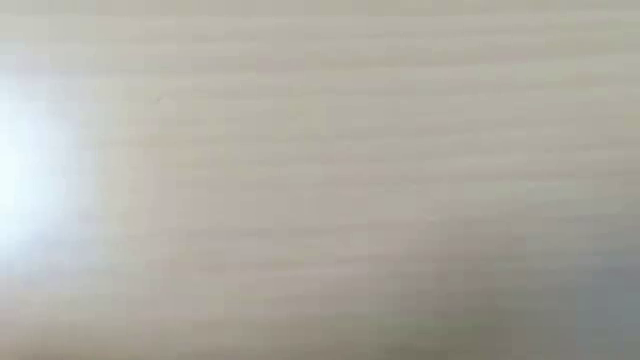

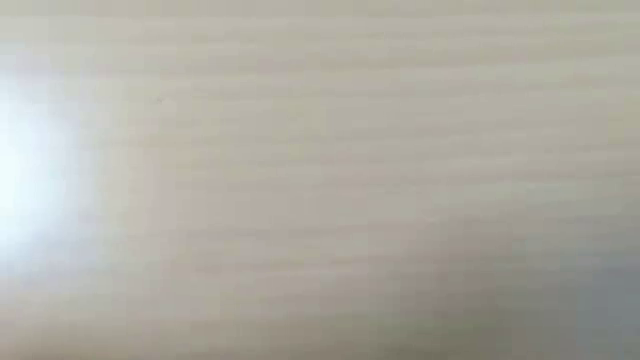

KeyboardInterrupt: ignored

In [4]:
# 讀取影格

cap = cv2.VideoCapture('h3.mp4') # 640*360 30FPS 509P

iso = cap.isOpened()

for x in range(int(cap.get(7))):

  cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

  a1, img1 = cap.read()

  cap.set(cv2.CAP_PROP_POS_FRAMES, x)

  a2, img2 = cap.read()

  # 複製辨識影格

  imgContour = img2.copy()

  # 去除雜訊

  img3 = cv2.subtract(img1, img2)

  img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

  img3 = cv2.morphologyEx(img3, cv2.MORPH_CLOSE, np.ones((50, 50)))

  # 二值化

  ret, img3 = cv2.threshold(img3, 90, 255, cv2.THRESH_BINARY)

  # 計算邊線

  canny = cv2.Canny(img3, 60, 90)

  # 繪製邊線

  contours, hierarchy = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

  try:

    x,y,w,h = cv2.boundingRect(contours[-1])

    imgContour = cv2.rectangle(imgContour, (x-25, y-25), (x+w+25, y+h+25), (0, 0, 255), 2)

    cv2_imshow(imgContour)

  except:
    
    cv2_imshow(imgContour)